<a href="https://colab.research.google.com/github/R4HUL-ROY/Multimodal_feature_extraction/blob/main/wordCloud_Covid19_keyFindings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [43]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine Learning/ML DATASET/COVID-19 AR Clinical Correlates July202020_text.csv")
print(dataset.shape)
dataset.head()

(260, 7)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,patient_id,Diag to img study (days),Diagnosis to Imaging time (hrs),Image Study Description,study modality,FIO2 @ time of img study,Radiologist KEY FINDINGS
1,COVID-19-AR-16434409,0,15,XR CHEST AP PORTABLE,DX,NaN,Subtle patchy bibasilar and right upper lobe a...
2,COVID-19-AR-16434381,0,18,XR CHEST AP PORTABLE,DX,NaN,Streaky opacities in bilateral mid and left lo...
3,COVID-19-AR-16434381,2,56,XR CHEST AP ONLY,DX,NaN,Lung volumes remain low but there appears to h...
4,COVID-19-AR-16406513,0,19,XR CHEST PA AND LATERAL,"CR,DX",NaN,patchy increased opacity in the lower lobes b...


In [44]:
dataset.columns=dataset.iloc[0]
dataset=dataset[1:]
dataset

,patient_id,Diag to img study (days),Diagnosis to Imaging time (hrs),Image Study Description,study modality,FIO2 @ time of img study,Radiologist KEY FINDINGS
1,COVID-19-AR-16434409,0,15,XR CHEST AP PORTABLE,DX,NaN,Subtle patchy bibasilar and right upper lobe a...
2,COVID-19-AR-16434381,0,18,XR CHEST AP PORTABLE,DX,NaN,Streaky opacities in bilateral mid and left lo...
3,COVID-19-AR-16434381,2,56,XR CHEST AP ONLY,DX,NaN,Lung volumes remain low but there appears to h...
4,COVID-19-AR-16406513,0,19,XR CHEST PA AND LATERAL,"CR,DX",NaN,patchy increased opacity in the lower lobes b...
5,COVID-19-AR-16406513,1,27,CT PE CHEST,CT,NaN,Mild dependent atelectatic changes are seen in...
...,...,...,...,...,...,...,...
255,COVID-19-AR-16445122,0,19,XR CHEST AP PORTABLE,DX,NaN,Hazy airspace changes are seen in both lung ba...
256,COVID-19-AR-16445149,5,134,XR CHEST AP PORTABLE,DX,NaN,Hypoinflated lungs with minimal bibasilar opa...
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dataset=dataset[['patient_id','Radiologist KEY FINDINGS']]
dataset = dataset.reset_index(drop=True)
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16434381,Lung volumes remain low but there appears to h...
3,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
4,COVID-19-AR-16406513,Mild dependent atelectatic changes are seen in...
...,...,...
254,COVID-19-AR-16445122,Hazy airspace changes are seen in both lung ba...
255,COVID-19-AR-16445149,Hypoinflated lungs with minimal bibasilar opa...
256,NaN,NaN
257,NaN,NaN


In [46]:
dataset.dropna(inplace=True)
print(dataset.shape)

(256, 2)


In [47]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16434381,Lung volumes remain low but there appears to h...
3,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
4,COVID-19-AR-16406513,Mild dependent atelectatic changes are seen in...
...,...,...
251,COVID-19-AR-16439200,Lungs are moderately inflated but there are wo...
252,COVID-19-AR-16439190,Diffusely distributed throughout the lungs are...
253,COVID-19-AR-16445122,Multiple bilateral diffuse peripheral areas of...
254,COVID-19-AR-16445122,Hazy airspace changes are seen in both lung ba...


In [48]:
dataset['Radiologist KEY FINDINGS'] = dataset.groupby(['patient_id'])['Radiologist KEY FINDINGS'].transform(lambda x : ' '.join(x))
  
# drop duplicate data
dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop=True)
dataset.shape

(105, 2)

In [49]:
# removing punctuations
import re
dataset['Radiologist KEY FINDINGS'] = [re.sub(r'[^\w\s]','',s) for s in dataset['Radiologist KEY FINDINGS']]
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
3,COVID-19-AR-16439216,No relevant findings Interval development of p...
4,COVID-19-AR-16406491,There has been development of bilateral lower ...
...,...,...
100,COVID-19-AR-16434383,There are bibasilar airspace opacities left wo...
101,COVID-19-AR-16439200,Hypoinflated lungs with bibasilar opacities Lu...
102,COVID-19-AR-16439190,Diffusely distributed throughout the lungs are...
103,COVID-19-AR-16445122,Multiple bilateral diffuse peripheral areas of...


In [50]:
# Tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
dataset['Radiologist KEY FINDINGS'] = [nltk.word_tokenize(s) for s in dataset['Radiologist KEY FINDINGS']]
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,"[Subtle, patchy, bibasilar, and, right, upper,..."
1,COVID-19-AR-16434381,"[Streaky, opacities, in, bilateral, mid, and, ..."
2,COVID-19-AR-16406513,"[patchy, increased, opacity, in, the, lower, l..."
3,COVID-19-AR-16439216,"[No, relevant, findings, Interval, development..."
4,COVID-19-AR-16406491,"[There, has, been, development, of, bilateral,..."
...,...,...
100,COVID-19-AR-16434383,"[There, are, bibasilar, airspace, opacities, l..."
101,COVID-19-AR-16439200,"[Hypoinflated, lungs, with, bibasilar, opaciti..."
102,COVID-19-AR-16439190,"[Diffusely, distributed, throughout, the, lung..."
103,COVID-19-AR-16445122,"[Multiple, bilateral, diffuse, peripheral, are..."


In [52]:
#removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [53]:
# removing stopwords
def remove_stopword(word_list):
    new_word_list = []
    for word in word_list:
        if word.lower() not in stop_words:
            new_word_list.append(word)
    return new_word_list

dataset['Radiologist KEY FINDINGS'] = [remove_stopword(this_list) for this_list in dataset['Radiologist KEY FINDINGS']]

In [54]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,"[Subtle, patchy, bibasilar, right, upper, lobe..."
1,COVID-19-AR-16434381,"[Streaky, opacities, bilateral, mid, left, low..."
2,COVID-19-AR-16406513,"[patchy, increased, opacity, lower, lobes, bil..."
3,COVID-19-AR-16439216,"[relevant, findings, Interval, development, pa..."
4,COVID-19-AR-16406491,"[development, bilateral, lower, lobe, airspace..."
...,...,...
100,COVID-19-AR-16434383,"[bibasilar, airspace, opacities, left, worse, ..."
101,COVID-19-AR-16439200,"[Hypoinflated, lungs, bibasilar, opacities, Lu..."
102,COVID-19-AR-16439190,"[Diffusely, distributed, throughout, lungs, ar..."
103,COVID-19-AR-16445122,"[Multiple, bilateral, diffuse, peripheral, are..."


In [55]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer  = WordNetLemmatizer()
lemmatized_dataset = []

for this_str in dataset['Radiologist KEY FINDINGS']:
    lemmatized_str = []
    for word in this_str:
        lemmatized_str.append(lemmatizer.lemmatize(word))
    lemmatized_dataset.append(lemmatized_str)

dataset['Radiologist KEY FINDINGS'] = lemmatized_dataset

In [56]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,"[Subtle, patchy, bibasilar, right, upper, lobe..."
1,COVID-19-AR-16434381,"[Streaky, opacity, bilateral, mid, left, lower..."
2,COVID-19-AR-16406513,"[patchy, increased, opacity, lower, lobe, bila..."
3,COVID-19-AR-16439216,"[relevant, finding, Interval, development, pat..."
4,COVID-19-AR-16406491,"[development, bilateral, lower, lobe, airspace..."
...,...,...
100,COVID-19-AR-16434383,"[bibasilar, airspace, opacity, left, worse, ri..."
101,COVID-19-AR-16439200,"[Hypoinflated, lung, bibasilar, opacity, Lungs..."
102,COVID-19-AR-16439190,"[Diffusely, distributed, throughout, lung, are..."
103,COVID-19-AR-16445122,"[Multiple, bilateral, diffuse, peripheral, are..."


In [60]:
bigger_list = list(dataset["Radiologist KEY FINDINGS"])
print(bigger_list)

[['Subtle', 'patchy', 'bibasilar', 'right', 'upper', 'lobe', 'airspace', 'opacity'], ['Streaky', 'opacity', 'bilateral', 'mid', 'left', 'lower', 'lung', 'Patchy', 'opacity', 'right', 'lower', 'lung', 'pleural', 'effusion', 'Lung', 'volume', 'remain', 'low', 'appears', 'clearing', 'since', 'prior', 'radiograph'], ['patchy', 'increased', 'opacity', 'lower', 'lobe', 'bilaterally', 'pronounced', 'lateral', 'view', 'Small', 'pleural', 'effusion', 'Mild', 'dependent', 'atelectatic', 'change', 'seen', 'bilateral', 'upper', 'lobe', 'lower', 'lobe', 'superimposed', 'moderate', 'bilateral', 'lower', 'lobe', 'groundglass', 'consolidative', 'change', 'mild', 'right', 'middle', 'lobe', 'linear', 'atelectasis', 'small', 'groundglass', 'change', 'inferior', 'lingula', 'small', 'consolidation', 'surrounding', 'small', 'groundglass', 'change', 'Patchy', 'airspace', 'opacity', 'seen', 'within', 'bilateral', 'lower', 'lung', 'predominantly', 'leftsided', 'Haziness', 'left', 'costophrenic', 'angle'], ['re

In [63]:
token_words = []
for nested_list in bigger_list:
    token_words += nested_list

for idx, val in enumerate(token_words):
    token_words[idx] = token_words[idx].lower()

print(len(token_words))
print(token_words)    

2308
['subtle', 'patchy', 'bibasilar', 'right', 'upper', 'lobe', 'airspace', 'opacity', 'streaky', 'opacity', 'bilateral', 'mid', 'left', 'lower', 'lung', 'patchy', 'opacity', 'right', 'lower', 'lung', 'pleural', 'effusion', 'lung', 'volume', 'remain', 'low', 'appears', 'clearing', 'since', 'prior', 'radiograph', 'patchy', 'increased', 'opacity', 'lower', 'lobe', 'bilaterally', 'pronounced', 'lateral', 'view', 'small', 'pleural', 'effusion', 'mild', 'dependent', 'atelectatic', 'change', 'seen', 'bilateral', 'upper', 'lobe', 'lower', 'lobe', 'superimposed', 'moderate', 'bilateral', 'lower', 'lobe', 'groundglass', 'consolidative', 'change', 'mild', 'right', 'middle', 'lobe', 'linear', 'atelectasis', 'small', 'groundglass', 'change', 'inferior', 'lingula', 'small', 'consolidation', 'surrounding', 'small', 'groundglass', 'change', 'patchy', 'airspace', 'opacity', 'seen', 'within', 'bilateral', 'lower', 'lung', 'predominantly', 'leftsided', 'haziness', 'left', 'costophrenic', 'angle', 'rele

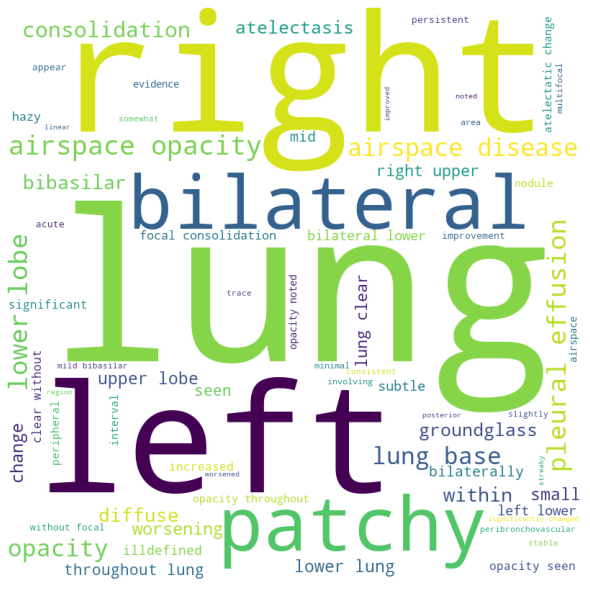

In [71]:
# generating WordCloud
 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
comment_words += " ".join(token_words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()